In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv into dataframe, categorical data already in encoded labels
df = pd.read_csv('data.csv')
df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


In [3]:
# checking for missing values
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [4]:
# pearson: standard correlation coefficient
df.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

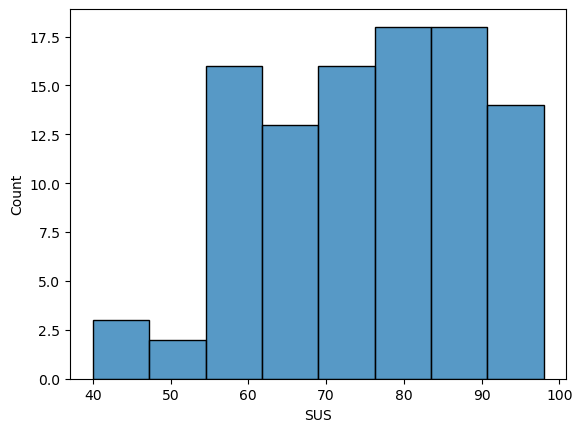

In [5]:
# looking at SUS distribution
sns.histplot(data=df['SUS'])
plt.show()

/opt/anaconda3/envs/env/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/env/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


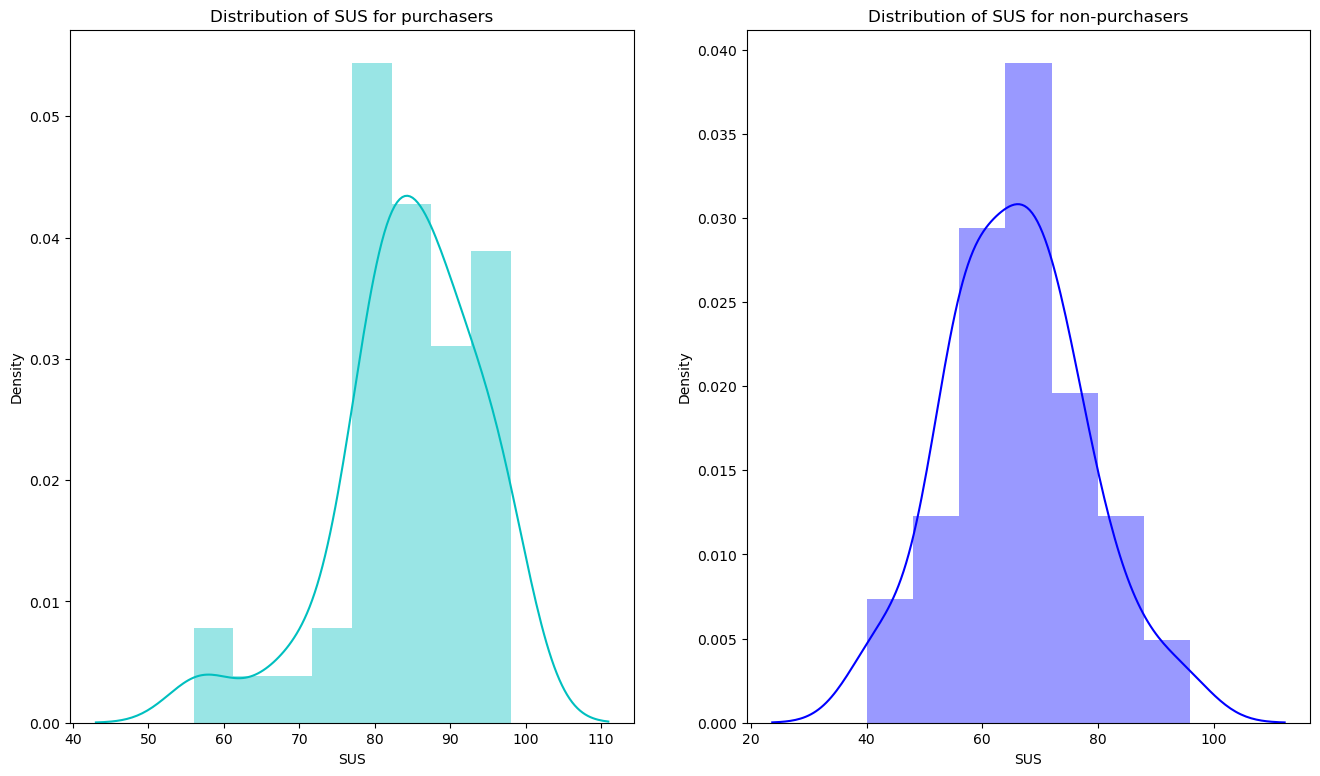

In [6]:
# plot distribution of SUS for purchasers and non-purchasers

fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(121)
sns.distplot(df.loc[df['Purchase'] == 1]['SUS'], color='c')
ax1.set_title('Distribution of SUS for purchasers')

ax2 = fig.add_subplot(122)
sns.distplot(df.loc[df['Purchase'] == 0]['SUS'], color='b')
ax2.set_title('Distribution of SUS for non-purchasers')

plt.show()

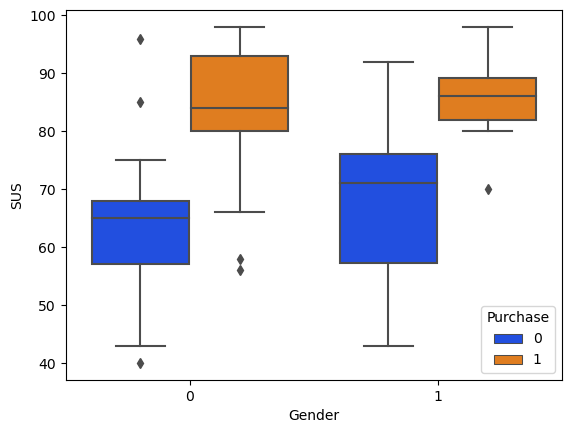

In [7]:
# compare SUS between genders of purchases
sns.boxplot(x="Gender", y="SUS", hue="Purchase", data=df, palette='bright')
plt.show() # 0-Female, 1-Male

In [13]:
# use Ordinary Least Squares (OLS) Regression to find significant variables

import statsmodels.api as sm

y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        17:40:00   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [9]:
# Regression Analysis

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
x = df.drop(columns='SUS')
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
# Lines, linear model prediction

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R squared score of linear regression model is: ", lr.score(x_test,y_test))

The R squared score of linear regression model is:  0.5610691437644406


In [12]:
# Quadratic

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503429807
